# # House Prices: Advanced Regression Techniques

Overview
There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,


We will going to use linear regression model to predict the price

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [282]:
train = pd.read_csv(r"D:\Projects\Kaggle\House_Prices_Advanced_Regression_Techniques\input\train.csv")
test = pd.read_csv(r"D:\Projects\Kaggle\House_Prices_Advanced_Regression_Techniques\input\test.csv")

See the header and the shape for both train and test

In [284]:
# Save those variables for training models
train_ID = train['Id']
test_ID = test['Id']
ntrain = train.shape[0] # number of training
ntest = test.shape[0] #number of test
y_train = train.SalePrice.values #value of saleprice

In [283]:
print(train.head())
print("=="* 50)
print(test.head())
print("="* 50)
print("train,shape :",train.shape)
print("test.shape : ",test.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

# Which label need to predict

Since our target is to predict the price for the house, our label is 'SalePrice' on the train set

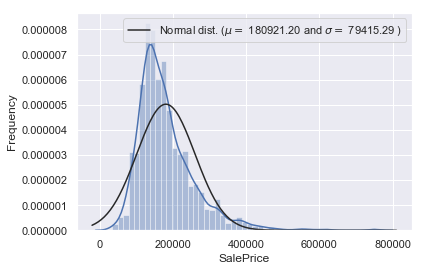

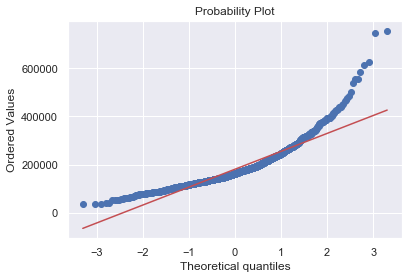

Skewness: 1.882876
Kurtosis: 6.536282


In [285]:
#Check the distribution for Sale Price on training set 
sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

The target variable SalePrice is not normally distributed and right skewed This will reduce the performance of the ML models. ML and normal distribution they very old friend :) We need to make it normal distribution

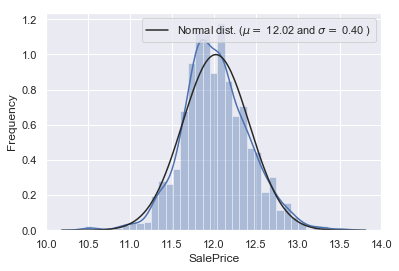

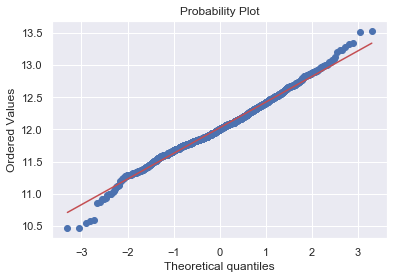

Skewness: 0.121347
Kurtosis: 0.809519


In [286]:
#We can use log transformation to make better distributed.
# use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the distribution for Sale Price on training set 
sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

It seems that the log transformation is a better choice for the data['SalePrice']. 

Bring all together into on Data

In [45]:
#We need to drop id's from train and test data and we've already save train_id and test_id from on the 2nd cell
#We need to drop 'ID' from both test and train data, it is useless for our test model
#train.drop("Id", axis = 1, inplace = True)
#test.drop("Id", axis = 1, inplace = True)

In [198]:
#train.head()

In [197]:
#We need to Concat train/test into one data frame
#data = pd.concat((train, test)).reset_index(drop=True)
#data.drop(['SalePrice'], axis=1, inplace=True)  # No need to include SalePrice since we'll using original data for test
#data.shape

We use data for submit in kaggle, and will use train data as EDA and testing model

# EDA qualitative(categorical) and quantitative(numerical)

Categorical

In [287]:
# create variables for Categorical and Numerical 
cat_feats = train.dtypes[train.dtypes == "object"].index  

In [288]:
#print out 
print('Numerical features')
print(train[num_feats].columns)
print("="*100)
print('Categorical features')
print(train[cat_feats].columns)
print("="*100)
print("quantitative: ",len(num_feats))
print("qualitative", len(cat_feats))

Numerical features
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical features
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', '

They are 38 numerical (including 'SalePrice') and  43 categorical (including 'Id' and 'SalePrice').

In [290]:
#DataFrame for qualitative
cat_df = pd.DataFrame(columns = ['qualitative','values', '#values_no_na','missing_value','percent'])
cat_df['qualitative'] = [ c for c in train[cat_feats].columns]
cat_df['values'] = [train[cat_feats][c].unique() for c in train[cat_feats]]
cat_df['#values_no_na'] = [int(train[cat_feats][c].nunique()) for c in train[cat_feats]]  # will not count NAs values
cat_df['missing_value'] = [train[cat_feats][c].isnull().sum() for c in train[cat_feats]]
cat_df['percent'] = [(train[cat_feats][c].isnull().sum()/ len(train[cat_feats])).round(3)*100 for c in train[cat_feats]]

In [291]:
cat_df.sort_values(by ='missing_value', inplace = True, ascending = False)
cat_df.head()

,qualitative,values,#values_no_na,missing_value,percent
38,PoolQC,"[nan, Ex, Fa, Gd]",3,1453,99.5
40,MiscFeature,"[nan, Shed, Gar2, Othr, TenC]",4,1406,96.3
2,Alley,"[nan, Grvl, Pave]",2,1369,93.8
39,Fence,"[nan, MnPrv, GdWo, GdPrv, MnWw]",4,1179,80.8
32,FireplaceQu,"[nan, TA, Gd, Fa, Ex, Po]",5,690,47.3


Alley, FireplaceQu, PoolQC, Fence and MiscFeature suffer almost or more than 45% data missing, it is better to drop since it have more then 15%.

In [292]:
train.drop(['Id', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis=1, inplace=True) 

In [293]:
cat_feats = train.dtypes[train.dtypes == "object"].index

In [235]:
#cat_feats = train.dtypes[train.dtypes == "object"].index

In [294]:
#according to description, Nan value of the pool means no pool in the house
#put all missing value on the list
missing_cat = train[cat_feats].isnull().sum()
missing_cat = missing_cat[missing_cat > 0].sort_values(ascending=False).index.tolist() 
missing_cat

['GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

In [295]:
#fill missing value with None, better to fill with most popular values.
#For now will fill with None
for col in missing_cat:
     train[col].fillna('None', inplace=True)

In [296]:
#Check if there any missing value on qualitative.
train[cat_feats].isnull().sum().sum()

0

Numerical

In [297]:
# create variables Numerical 
num_feats = train.dtypes[train.dtypes != "object"].index

In [298]:
#DataFrame for Missing value
num_df = pd.DataFrame(columns = ['quantitative','values', '#values_no_na','missing_value','percent'])
num_df['quantitative'] = [ c for c in train[num_feats].columns]
num_df['values'] = [train[num_feats][c].unique() for c in train[num_feats]]
num_df['#values_no_na'] = [int(train[num_feats][c].nunique()) for c in train[num_feats]]  # will not count NAs values
num_df['missing_value'] = [train[num_feats][c].isnull().sum() for c in train[num_feats]]
num_df['percent'] = [(train[num_feats][c].isnull().sum()/ len(train[num_feats])).round(3)*100 for c in train[num_feats]]

In [299]:
num_df.sort_values(by ='missing_value', inplace = True, ascending = False)
num_df

,quantitative,values,#values_no_na,missing_value,percent
1,LotFrontage,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110,259,17.7
24,GarageYrBlt,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",97,81,5.5
7,MasVnrArea,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",327,8,0.5
28,OpenPorchSF,"[61, 0, 42, 35, 84, 30, 57, 204, 4, 21, 33, 21...",202,0,0.0
21,KitchenAbvGr,"[1, 2, 3, 0]",4,0,0.0
22,TotRmsAbvGrd,"[8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]",12,0,0.0
23,Fireplaces,"[0, 1, 2, 3]",4,0,0.0
25,GarageCars,"[2, 3, 1, 0, 4]",5,0,0.0
26,GarageArea,"[548, 460, 608, 642, 836, 480, 636, 484, 468, ...",441,0,0.0
27,WoodDeckSF,"[0, 298, 192, 40, 255, 235, 90, 147, 140, 160,...",274,0,0.0


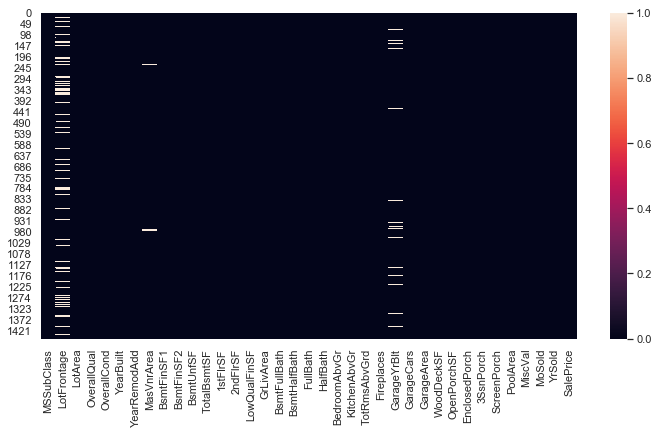

In [300]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train[num_feats].isnull())
plt.show()

LotFrontage, GarageYrBlt and MasVnrArea are having missing value, we will fill it with mean or with zero value

In [301]:
cat =[]
for c in list(cat_feats) :
    print(train[c].value_counts())
    print('=='*100)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [302]:
#Finding Missing value on cat_feats
missing_num = train[num_feats].isnull().sum()
missing_num = missing_num[missing_num > 0].sort_values(ascending=False).index.tolist() 
missing_num

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [303]:
#Finding Missing value on cat_feats
missing_num = train[num_feats].isnull().sum()
missing_num = missing_num[missing_num > 0].sort_values(ascending=False).index.tolist() 
missing_num

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [304]:
#fill missing value with mean for missing_num
# replace 'NaN' with 'mean' in these columns
for col in missing_num:
    train[col].fillna(data[col].mean(), inplace=True)

# Corralation

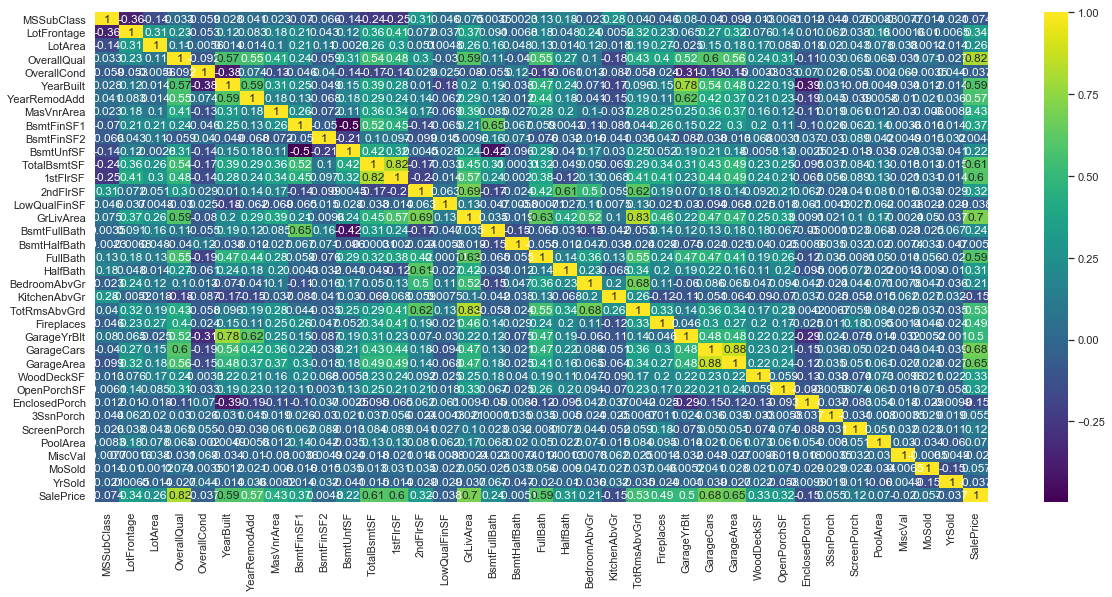

In [305]:
train_corr = train[num_feats]
#PLot corr
plt.subplots(figsize=(20,9))
sns.heatmap(train_corr.corr(), annot=True, cmap='viridis',linecolor="white")

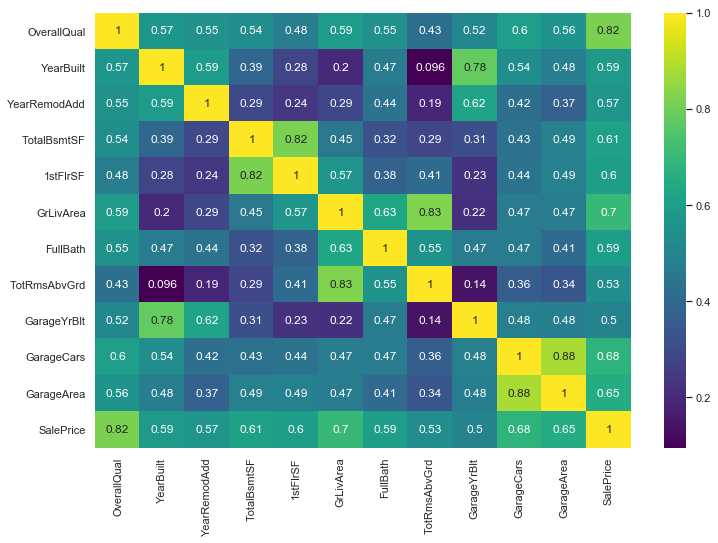

In [306]:
#let find top 50% Corralation train attributes with sale-price
#top_feature = corr.index[abs(corr['SalePrice']>0.5)]
corr = train_corr.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(train[corr.index[abs(corr['SalePrice']>0.5)]].corr(), annot=True, cmap='viridis', linecolor="white")
plt.show();

OverallQual, GrLivArea and TotalBsmtSF have strong correlation with SalePrice> also GarageCars and GarageArea not only have strong correlation with SalePrice, but also have strong correlation with each other and so on.

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


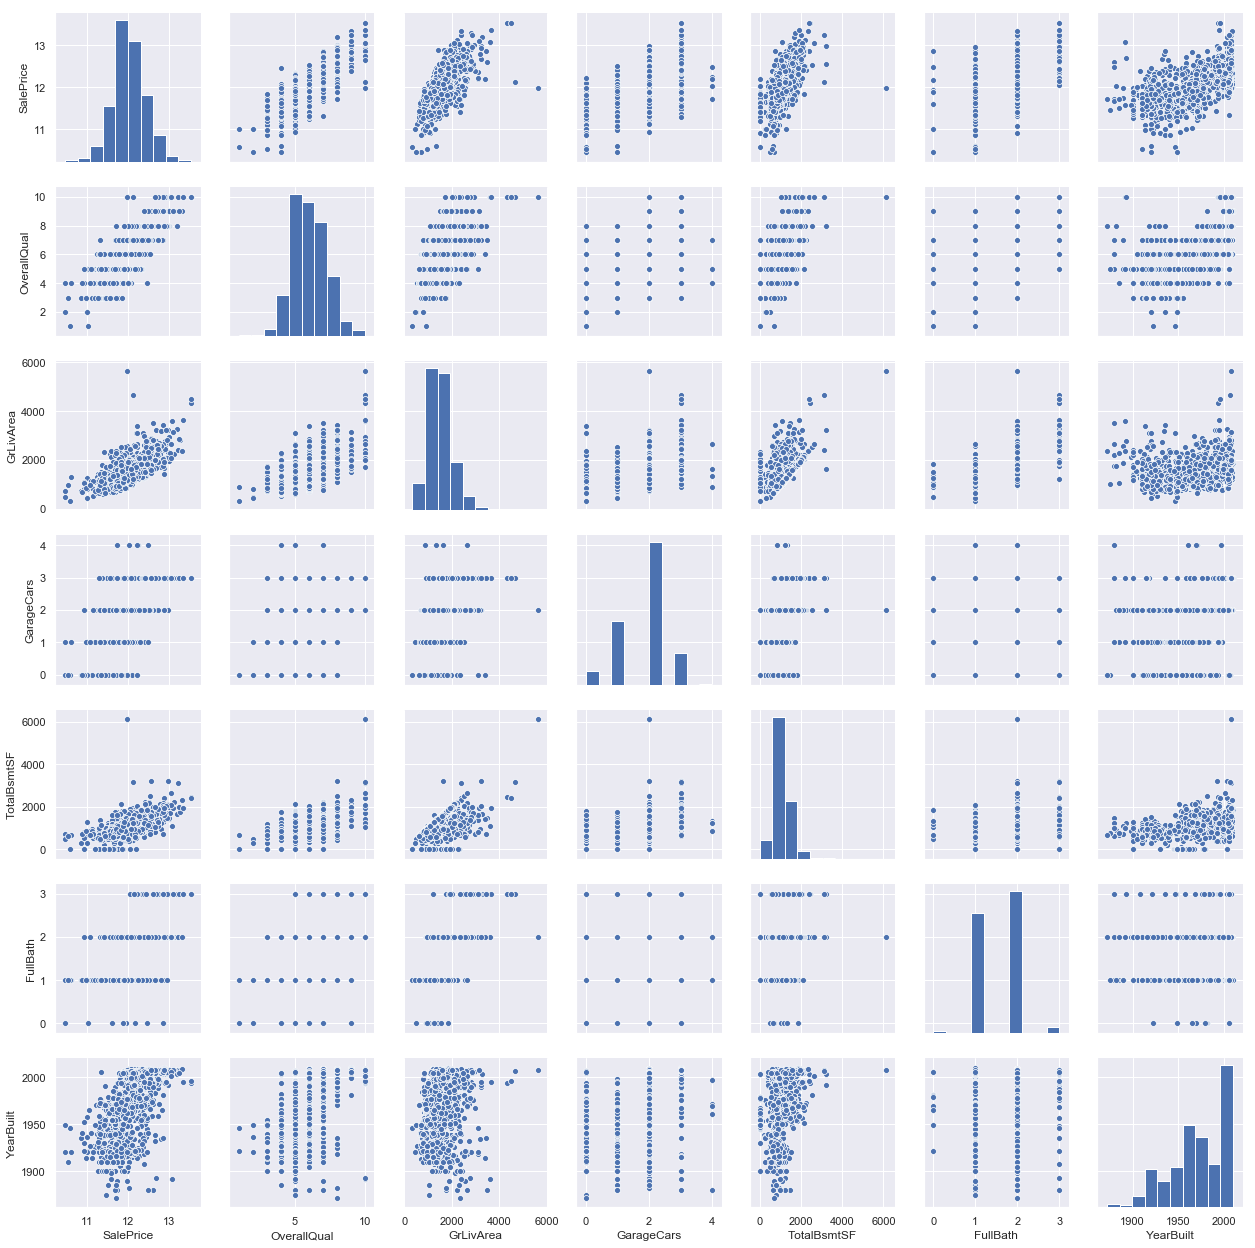

In [307]:
#Scatter graph between SalePrice and Most important feature
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size=2.5)
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


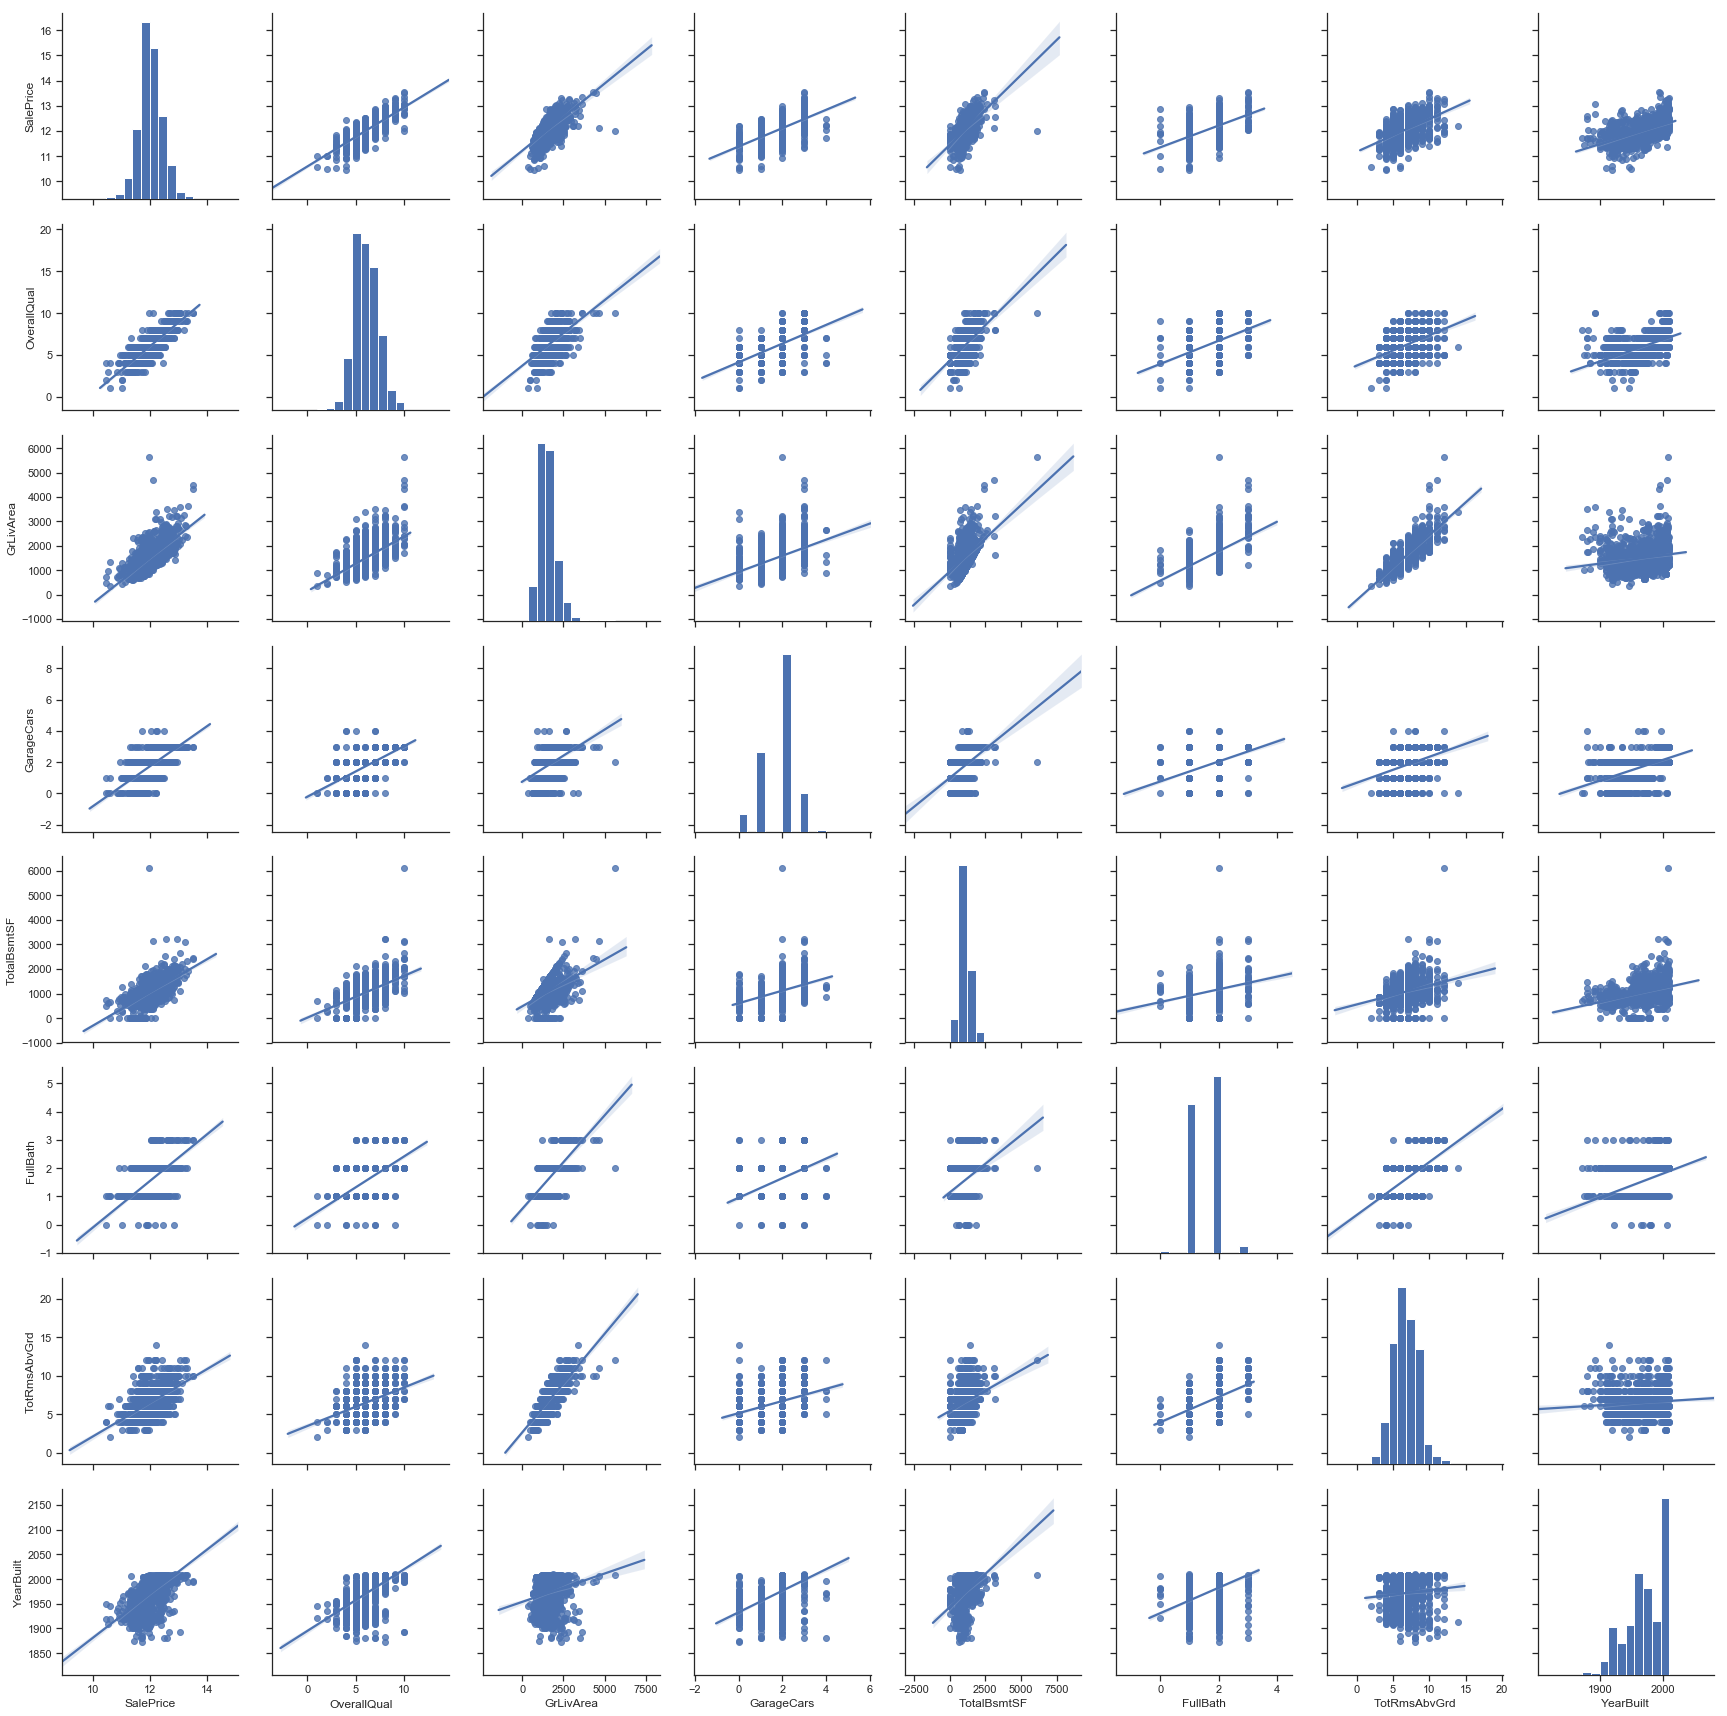

In [308]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [309]:
print("Find most important features relative to target")
cor = train.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
cor

Find most important features relative to target


OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.501656
Fireplaces       0.489450
MasVnrArea       0.429498
BsmtFinSF1       0.372023
LotFrontage      0.335555
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

In [310]:
#We'll remove corr between -0.1, 0.1
train.drop('MoSold', axis=1, inplace=True)
train.drop('3SsnPorch', axis=1, inplace=True)
train.drop('BsmtFinSF2', axis=1, inplace=True)
train.drop('BsmtHalfBath', axis=1, inplace=True)
train.drop('MiscVal', axis=1, inplace=True)
train.drop('LowQualFinSF', axis=1, inplace=True)
train.drop('YrSold', axis=1, inplace=True)
train.drop('OverallCond', axis=1, inplace=True)
train.drop('MSSubClass', axis=1, inplace=True)

In [311]:
train.shape

(1460, 66)

In [312]:
categorical_data = train.dtypes[train.dtypes == "object"].index.tolist()
categorical_data

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [326]:
from sklearn.preprocessing import LabelEncoder
#col = ('MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
 #'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
 #'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
 #'Heating','HeatingQC', 'CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition')
for c in categorical_data:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# ML Model

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,3,3,0,4,0,5,...,5,2,0,61,0,0,0,8,4,12.247699
1,3,80.0,9600,1,3,3,0,2,0,24,...,5,2,298,0,0,0,0,8,4,12.109016
2,3,68.0,11250,1,0,3,0,4,0,5,...,5,2,0,42,0,0,0,8,4,12.317171
3,3,60.0,9550,1,0,3,0,0,0,6,...,5,2,0,35,272,0,0,8,0,11.849405
4,3,84.0,14260,1,0,3,0,2,0,15,...,5,2,192,84,0,0,0,8,4,12.429220


In [330]:
#Splitting Data Set
X = train.drop(['SalePrice'],axis=1).values

In [360]:
from sklearn.model_selection import train_test_split
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y_train, test_size=0.2, random_state=7)
print(X_train.shape)
print(X_test.shape)

(438, 66)
(1022, 66)


In [361]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets, linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train_set, y_train_set)
pred = lr.predict(X_test_set)

In [362]:
print("Predict value " , str(lr.predict([X_test_set[0]])))
print("Real value " , str(y_test_set[0]))

Predict value  [160807.98435878]
Real value  152000


In [363]:
#Score/Accuracy
print("Accuracy --> ", lr.score(X_test_set, y_test_set)*100)
#RSME
print("RSME:" , mean_squared_error(y_test_set, pred))

Accuracy -->  86.65644632578734
RSME: 965036527.8638914


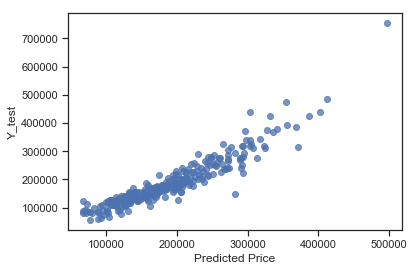

In [366]:
#Plot
plt.scatter(pred, y_test_set, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Y_test')
plt.show()

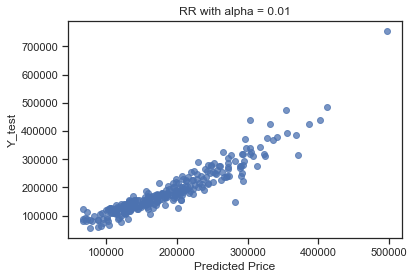

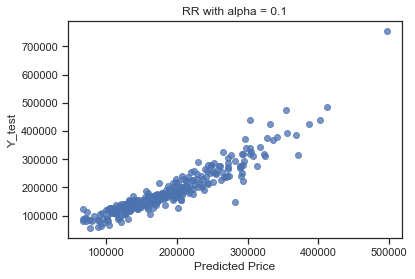

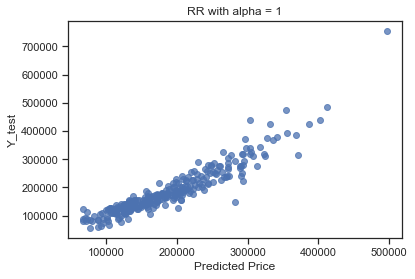

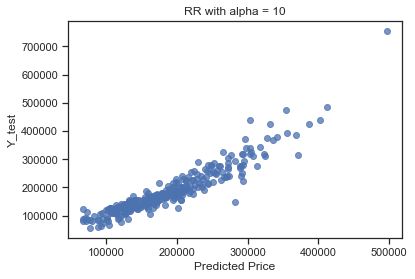

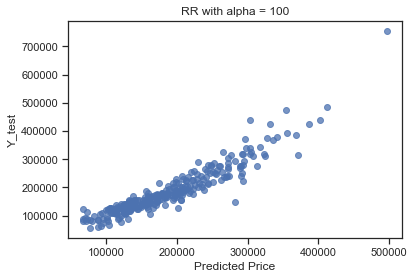

In [368]:
#Let improve Linear regression using ridge regulization
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train_set, y_train_set)
    preds_ridge = ridge_model.predict(X_test_set)
    
    plt.scatter(pred, y_test_set, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Y_test')
    plt.title('RR with alpha = {}'.format(alpha))
    plt.show()

Nothing change, same result. 
With accuracy 86.66% not bat, but we can make it better with we didn't count outlier on the model and others attribute.

In [369]:
#Submission
submission = pd.DataFrame()
submission['Id'] = test_ID
feats = test_.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

In [411]:
feats = test_.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()